# House Price Analysis using R-Language

### created by: <font color='Orange'>Anton Suhartono</font>

### Vars used in this analysis
- Saleprice : Price of House
- GarageArea: Size of garage in square feet
- GarageCond: Garage condition

| Item      | Description      |
| --------- |:----------------:|
| Ex        | Excellent        |
| Gd        | Good             |
| TA        | Typical/Average  |
| Fa        | Fair             |
| Po        | Poor             |
| NA        | No Garage        |

In [1]:
# @hidden_cell

if (Sys.getenv("RUNTIME_ENV_LOCATION_TYPE") == "external") {
    endpoint_727d4def164d419a9639a7b25d7ff121 = "s3.us.cloud-object-storage.appdomain.cloud"
} else {
    endpoint_727d4def164d419a9639a7b25d7ff121 = "s3.us.cloud-object-storage.appdomain.cloud"
}

# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

library("aws.s3")
obj <- get_object(
    object = "house_price.csv",
    bucket = "telkomathondsmentoringweek1assign-donotdelete-pr-ezgtcootkp2wv3",
    key = "6f25c01948214787bc62ec3c32e7babd",
    secret = "0172617d8faf5d5a96cbba5a7811d5fe379b856c6b183a78",
    check_region = FALSE,
    base_url = endpoint_727d4def164d419a9639a7b25d7ff121)

df_data_1 <- read.csv(text = rawToChar(obj))
head(df_data_1)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [2]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


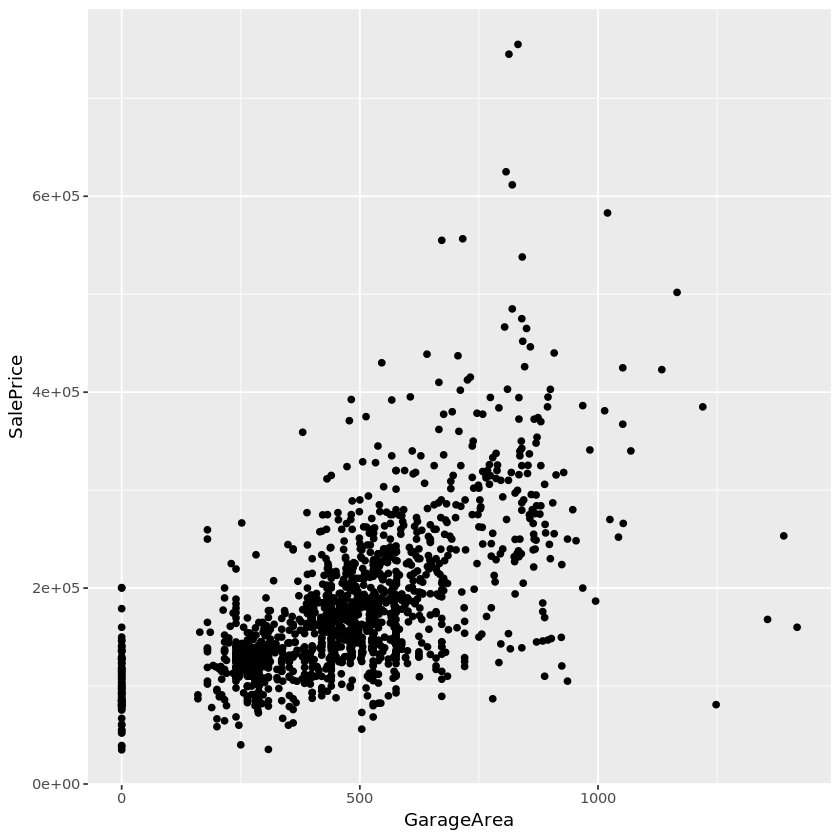

In [7]:
# Plot without grouping based on garage type
ggplot(df_data_1, aes(x = GarageArea, y = SalePrice)) +
  geom_point()

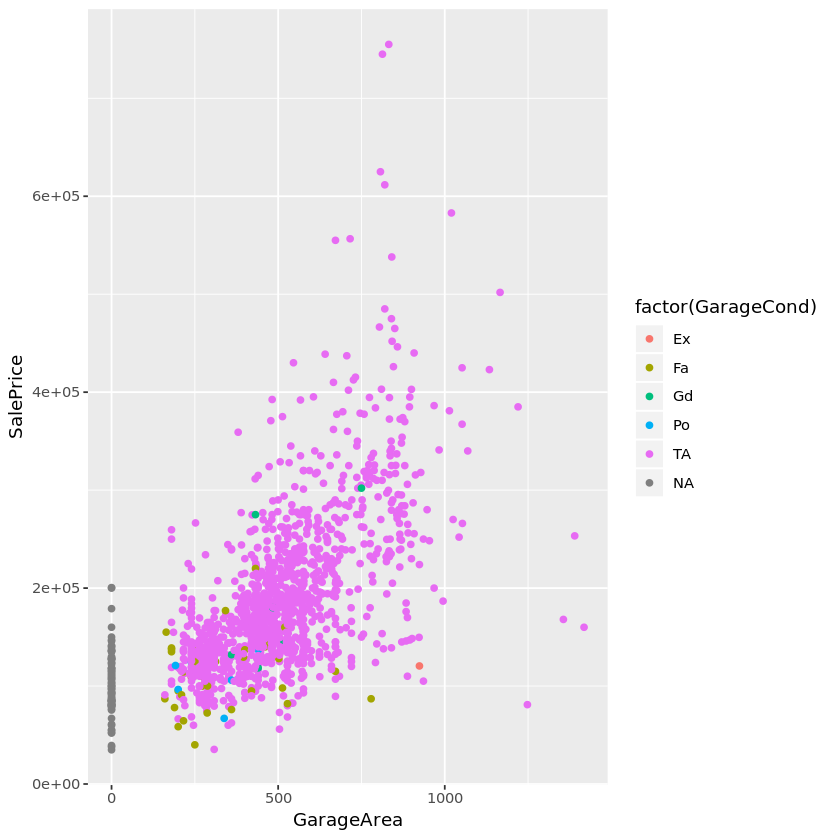

In [9]:
#Plot without grouping based on Garage Type
ggplot(df_data_1, aes(x = GarageArea, y = SalePrice)) +
  geom_point(aes(color = factor(GarageCond)))

In [10]:
unique(df_data_1$GarageCond)

[1] TA   Fa   <NA> Gd   Po   Ex  
Levels: Ex Fa Gd Po TA

## additional : regression line

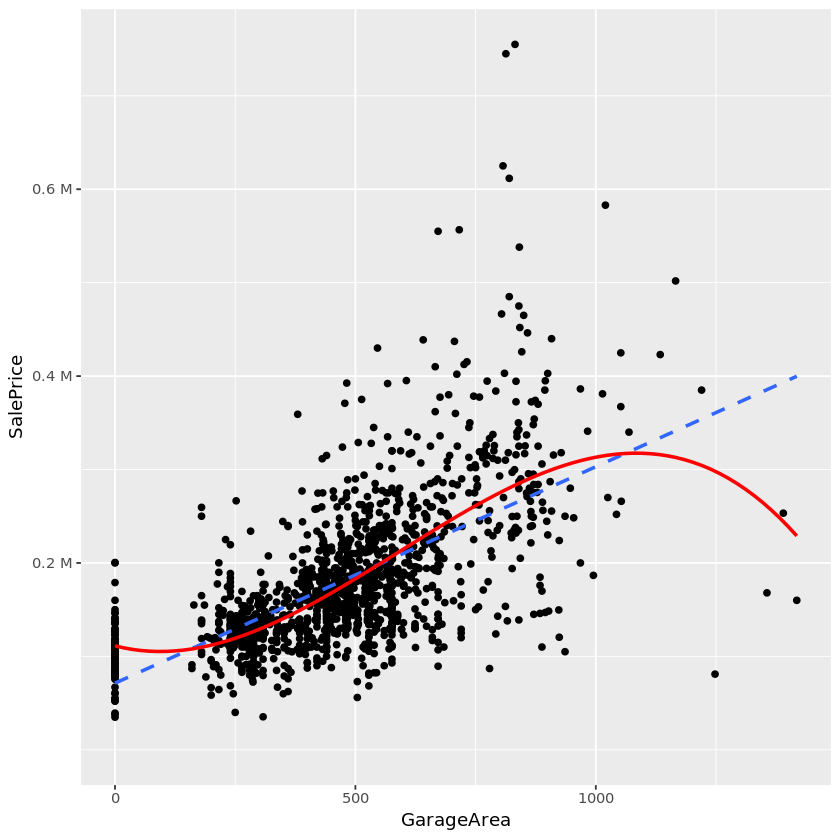

In [26]:
ylab <- c(0.2, 0.4, 0.6)

ggplot(df_data_1, aes(x = GarageArea, y = SalePrice)) +
  geom_point() +
  expand_limits(x = c(0, NA), y = c(0, NA)) +
  scale_y_continuous(labels = paste0(ylab, " M"),
                     breaks = 10^6 * ylab) + 
  geom_smooth(method='lm', formula= y~x, se= FALSE, linetype = "dashed") + 
geom_smooth(method = "lm", formula = y ~ poly(x, 3), se=FALSE, color = "red")